In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml


In [20]:
mnist = fetch_openml('mnist_784', version=1)

In [21]:
#parametre olarak bir dataframe ve ilgili veri fotoğrafının index numarasını alıyor:
def showimage(dframe, index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image,cmap="binary")
    plt.axis('off')
    plt.show()


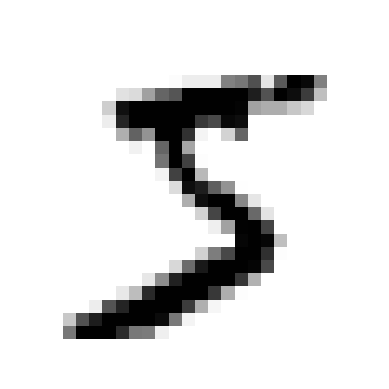

In [22]:
showimage(mnist.data, 0)

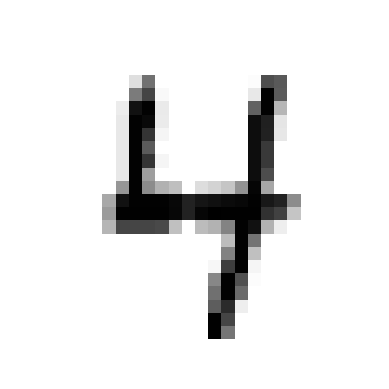

In [23]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)
type(train_img)
test_img_copy = test_img.copy()
showimage(test_img_copy, 1)


In [24]:
#verileri scale etmek: StandardScaler
scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [25]:
#PCA işlemi
pca = PCA(.95)
pca.fit(train_img)
print(pca.n_components_)

327


In [26]:
train_img = pca.transform(train_img)
test_img =pca.transform(test_img)

In [27]:
#Logistic Regression Modelini uygulayacağız:
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
#LogisticRegression modelimizi train data ile eğitme:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [28]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

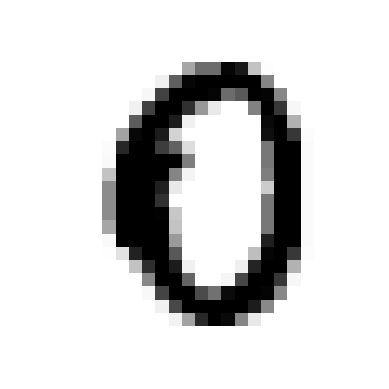

In [29]:
showimage(test_img_copy, 0)


In [30]:
logisticRegr.predict(test_img[1].reshape(1,-1))


array(['4'], dtype=object)

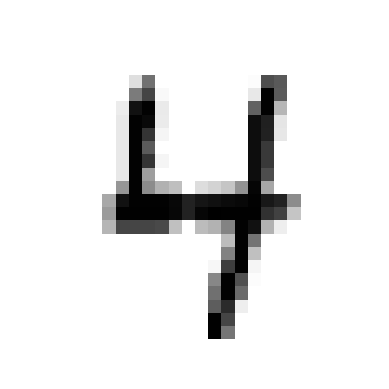

In [31]:
showimage(test_img_copy, 1)

In [32]:
#accuracy ölçme:
logisticRegr.score(test_img, test_lbl)

0.9185